Step 1
- Load the data 
- inspect the data
- Clean up the data from outliers
- create a method to calculate the throuput and avergare out the user

Imports and statics

In [993]:
from pandas import pandas as pd
from matplotlib import pyplot
import seaborn as sns
import numpy as np

MOVEMENT_TIME_THRESHOLD = 10
NON_SUSPICIOUS_MOVEMENT_TIME_THRESHOLD = 3


Functions

In [994]:
# Keep only the first entry for each user
def keep_first_entry_per_user(dataframe):
    return dataframe[~dataframe['uuid'].duplicated(keep='first')].reset_index(drop=True)


# Remove the first entry for each user
def remove_first_entry_per_user(dataframe):
    drop_indices = []
    seen = set()
    
    for index, row in dataframe.iterrows():
        uuid = row['uuid']
        if uuid in seen:
            continue
        drop_indices.append(index)
        seen.add(uuid)
        
    return dataframe.drop(index=drop_indices).reset_index(drop=True)


# Remove entries with movement_time higher than threshold
def remove_high_mt_outliers(dataframe, threshold):
    return dataframe[dataframe['movement_time'] <= threshold]


# Get entries with suspiciously high movement times
def get_suspicious_movement_times(dataframe):
    suspicious_uuids = []
    
    for _ , row in dataframe.iterrows():
        if row['movement_time'] > NON_SUSPICIOUS_MOVEMENT_TIME_THRESHOLD:
            suspicious_uuids.append(row['uuid'])
    
    return dataframe[dataframe['uuid'].isin(suspicious_uuids)]

# Read data

In [995]:
FOLDER = 'data/'
FILE = 'data.csv'
df = pd.read_csv(FOLDER + FILE) 

In [996]:
df.sort_values('movement_time', ascending=False)

,uuid,user_age,device,computer_time,target_object_id,misses,movement_time,index_difficulty
774,f03cac9f-8548-43aa-a2b9-de0d4e3135f6,54,Mouse,10,21,2,35.063,2.996
506,fa2558fd-5af8-495d-9bd1-cc550f0964cb,22,Mouse,5,16,0,24.554,4.203
736,8218f964-9ddc-4369-885f-3851eddecee7,61,Mouse,1,13,0,7.676,2.659
392,71a9bf81-f720-4655-8f6f-4f6728e37dd2,26,Mouse,6,11,5,6.643,1.839
781,f03cac9f-8548-43aa-a2b9-de0d4e3135f6,54,Mouse,10,0,3,5.981,2.055
...,...,...,...,...,...,...,...,...
720,9ccf3d9b-909d-4dd4-857c-197fbb349584,23,Mouse,8,8,0,0.380,1.796
528,fa2558fd-5af8-495d-9bd1-cc550f0964cb,22,Mouse,5,20,0,0.375,1.275
723,9ccf3d9b-909d-4dd4-857c-197fbb349584,23,Mouse,8,3,0,0.367,1.346
728,9ccf3d9b-909d-4dd4-857c-197fbb349584,23,Mouse,8,7,0,0.363,2.449


In [997]:
# Create a DataFrame with only one entry per user
total_users_df = keep_first_entry_per_user(df).copy()
total_users_df = total_users_df.drop(columns=['target_object_id', 'misses', 'movement_time', 'index_difficulty'])
total_users_df.sort_values('computer_time', ascending=False)

,uuid,user_age,device,computer_time
38,9282e556-a1cb-4a86-9996-a85159479b96,25,Mouse,16
10,4d54afa4-9488-4087-b197-e3f9e781b14e,28,Mouse,14
1,2efdf886-71a0-492f-9a1a-74f47b9f0ea1,25,Mouse,14
0,cd1842cb-4771-4c16-9de8-cc3e1bf66275,27,Trackpad,14
21,9443b4dc-66a2-47a4-92a8-39ccd2bf4a36,25,Mouse,12
35,1ed3368e-ee51-4eec-a627-feba6f4a91c8,57,Mouse,11
9,9ce933ac-17a3-4546-af21-5329a27ff930,24,Trackpad,11
33,f03cac9f-8548-43aa-a2b9-de0d4e3135f6,54,Mouse,10
37,61ef5fd0-1dd0-4f0f-b023-5bd52d66557e,27,Mouse,10
7,6c8add89-dbdf-4592-acfe-c456edc01838,24,Mouse,10


In [998]:
# Create an index mapping for UUIDs to unique integers as strings
uuid_to_index = {uuid: str(i) for i, uuid in enumerate(df['uuid'].unique(), start=1)}

# Add a new column 'uuid_index' to the original DataFrame
df['uuid_index'] = df['uuid'].map(uuid_to_index)


/var/folders/k4/kxtk7nnj1n15lg499xsvztv00000gn/T/ipykernel_3255/220846924.py:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['uuid_index'] = df['uuid'].map(uuid_to_index)


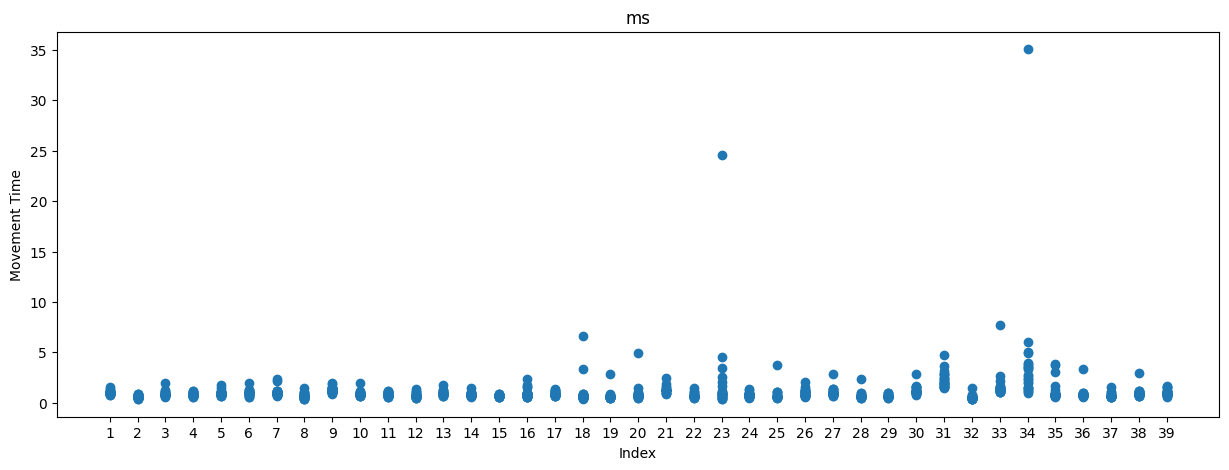

In [999]:
pyplot.figure(figsize=(15, 5))
pyplot.scatter(df['uuid_index'], df['movement_time'])
pyplot.xlabel('Index')
pyplot.ylabel('Movement Time')
pyplot.title('ms')
pyplot.show()

# Data cleanup

Removing the first click from useres

We remove the first entry from users because during testing, the timer calculating the clicking time started right after clicking Accept to the consent form, and no countdown was issued so many users were shocked they were instantly brought into testing.

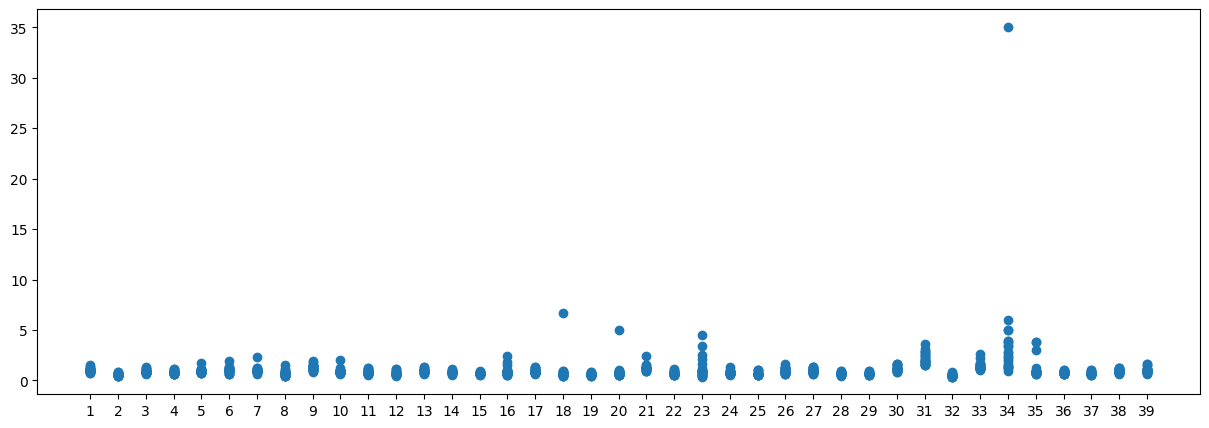

In [1000]:
# Remove the first entry for every user
main_data = remove_first_entry_per_user(df).copy()
main_data.shape

pyplot.figure(figsize=(15, 5))
pyplot.scatter(main_data['uuid_index'], main_data['movement_time'])

In [1001]:
columns_to_show = ['uuid', 'movement_time', 'target_object_id']
# pd.concat([df[columns_to_show].head(25), main_data[columns_to_show].head(25)], axis=1)

Removing the outliers

(857, 9)

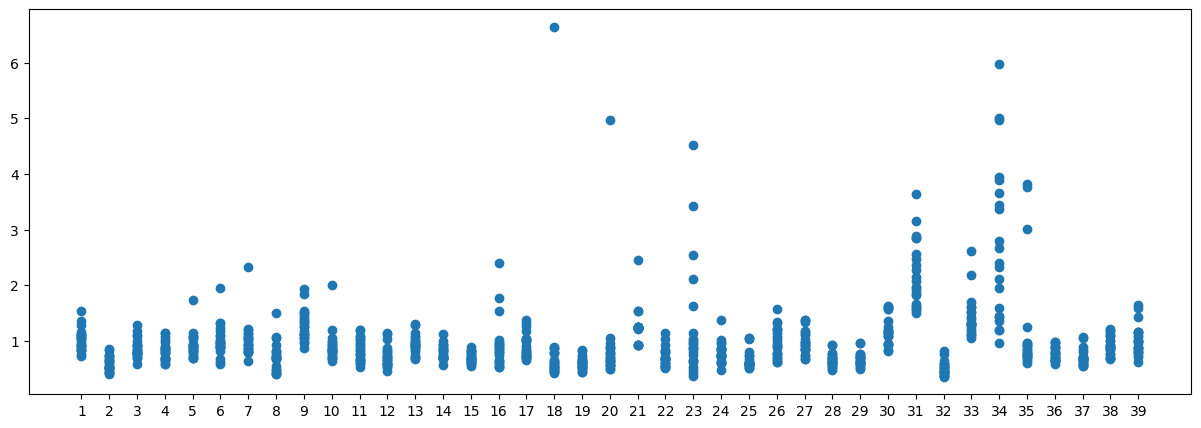

In [1002]:
data_cleaned = remove_high_mt_outliers(main_data, MOVEMENT_TIME_THRESHOLD).copy()
data_cleaned.loc[:, 'device'] = data_cleaned['device'].str.lower()

pyplot.figure(figsize=(15, 5))
pyplot.scatter(data_cleaned['uuid_index'], data_cleaned['movement_time'])
data_cleaned.shape


Show the suspicious users who have high movement_time but was not their first data entry

(131, 9)

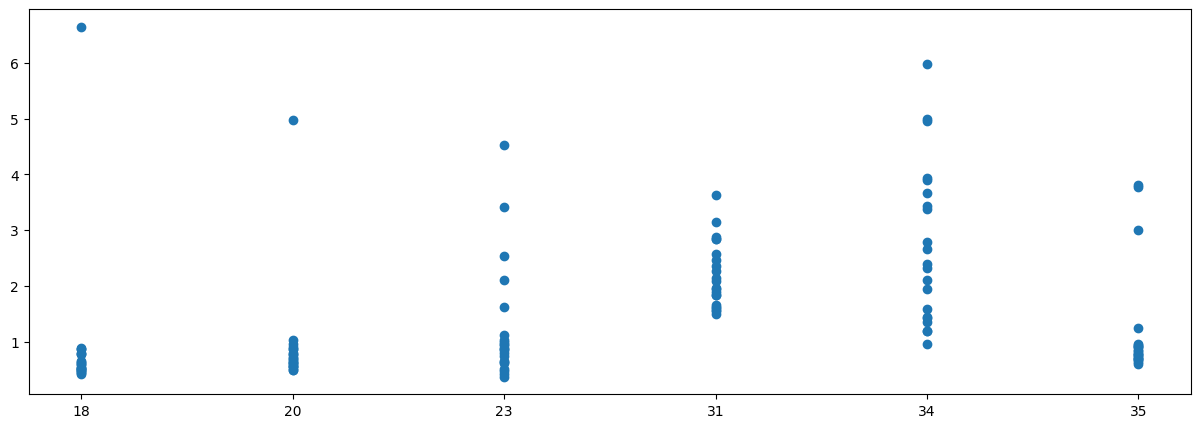

In [1003]:
suspicious_uuids = get_suspicious_movement_times(data_cleaned)

pyplot.figure(figsize=(15, 5))
pyplot.scatter(suspicious_uuids['uuid_index'], suspicious_uuids['movement_time'])
suspicious_uuids.shape



# Added by Katrine and Jonas

## Data Information

Model only works on users with age from 19 to 76

And on daily computer hours between 1 to 16

The data is slightly skewed and gives weird results if the test includes numbers that aren't within our dataset range

In [1004]:
# Calculate the Throughput performance according to Fitts' Law
# TP = sum(ID) / sum(MT) for each user
    
def get_user_category(avg_through_put, min, max):
        if avg_through_put < min:
            return 'low'
        elif avg_through_put < max:
            return 'medium'
        else:
            return 'high'
        

def aggregate_throughput_per_user(dataframe):
    
    grouped = dataframe.groupby('uuid').agg({
        'index_difficulty': 'sum',
        'movement_time': 'sum',
        'misses': 'sum',
        'device': 'first',
        'computer_time': 'first',
        'user_age': 'first'
    }).reset_index()
    
    
    grouped.loc[:,'avg_through_put'] = grouped['index_difficulty'] / grouped['movement_time']
    grouped.loc[:,'total_misses'] = grouped['misses']

    throughput_per_user = grouped[['uuid','total_misses','computer_time','user_age','device', 'avg_through_put']].copy()
    
    mouse_users_df = throughput_per_user[throughput_per_user['device'] == 'mouse']
    trackpad_users_df = throughput_per_user[throughput_per_user['device'] == 'trackpad']
    
    min_mouse_tp, max_mouse_tp = mouse_users_df['avg_through_put'].quantile([0.33, 0.66])
    min_trackpad_tp, max_trackpad_tp = trackpad_users_df['avg_through_put'].quantile([0.33, 0.66])
    
    print(f"Mouse TP thresholds: min={min_mouse_tp}, max={max_mouse_tp}")
    print(f"Trackpad TP thresholds: min={min_trackpad_tp}, max={max_trackpad_tp}")
    
    
    for index, row in throughput_per_user.iterrows():
        if row['device'] == 'mouse':
            category = get_user_category(row['avg_through_put'], min_mouse_tp, max_mouse_tp)
        else:
            category = get_user_category(row['avg_through_put'], min_trackpad_tp, max_trackpad_tp)
        
        throughput_per_user.at[index, 'performance_category'] = category
    
    return throughput_per_user

throughput_per_user = aggregate_throughput_per_user(data_cleaned)
throughput_per_user


Mouse TP thresholds: min=2.4098172214276206, max=3.041541602815436
Trackpad TP thresholds: min=2.2972007398671126, max=2.507317024316293


,uuid,total_misses,computer_time,user_age,device,avg_through_put,performance_category
0,044db93c-82bc-48f1-aac1-fa16380fe30e,1,6,56,mouse,2.222248,low
1,1ed3368e-ee51-4eec-a627-feba6f4a91c8,0,11,57,mouse,2.958651,medium
2,231c917b-cd39-4469-8f5b-e9e3bf7c414e,0,8,24,trackpad,1.725171,low
3,2bd9e194-6807-4af6-a35c-fd4fdc85f738,2,8,24,mouse,3.040767,medium
4,2efdf886-71a0-492f-9a1a-74f47b9f0ea1,0,14,25,mouse,3.648722,high
5,3527f0ed-bd6c-4e87-848c-41901af06c1c,0,6,26,mouse,3.803750,high
6,3c267c85-ac72-44b4-9536-c2da384053e7,3,3,20,trackpad,2.406347,medium
7,47b47389-5857-4d06-9e78-2d8f40dd0a4c,1,7,24,mouse,1.675165,low
8,4d54afa4-9488-4087-b197-e3f9e781b14e,0,14,28,mouse,2.776185,medium
9,4f1141fb-49fd-4309-a465-1de91a34c2c3,1,10,54,mouse,1.775393,low


# Calculations per user


In [1005]:
all_user_data = throughput_per_user.copy()
users_with_mouse = all_user_data[all_user_data['device'] == 'mouse']
users_with_trackpad = all_user_data[all_user_data['device'] == 'trackpad']

user_based_data = all_user_data.copy()
user_based_data.sort_values('device')
user_based_data.head(2)


,uuid,total_misses,computer_time,user_age,device,avg_through_put,performance_category
0,044db93c-82bc-48f1-aac1-fa16380fe30e,1,6,56,mouse,2.222248,low
1,1ed3368e-ee51-4eec-a627-feba6f4a91c8,0,11,57,mouse,2.958651,medium


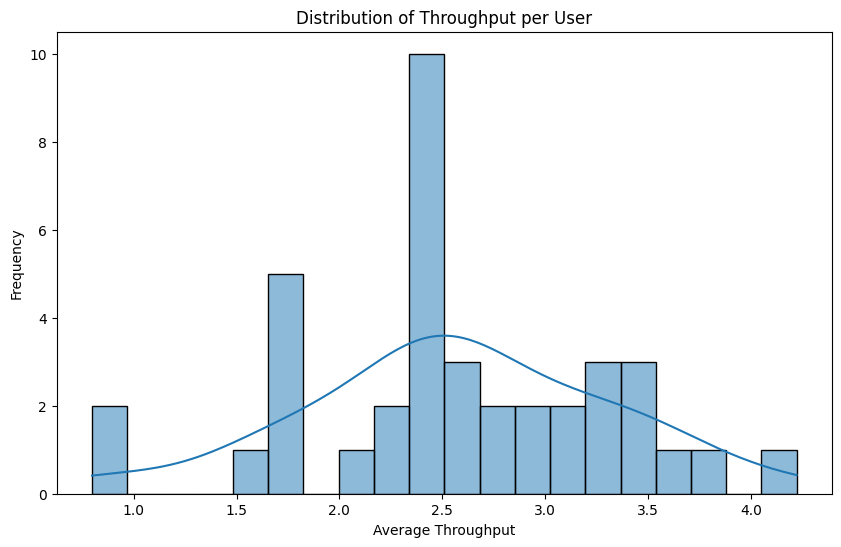

In [1006]:
pyplot.figure(figsize=(10, 6))
sns.histplot(user_based_data['avg_through_put'], bins=20, kde=True)
pyplot.xlabel('Average Throughput')
pyplot.ylabel('Frequency')
pyplot.title('Distribution of Throughput per User')
pyplot.show()

In [1007]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


# Create a copy of user_based_data and encode the device column
encoded_user_based_data = user_based_data.copy()
label_encoder = LabelEncoder()
encoded_user_based_data.loc[:, 'device_encoded'] = label_encoder.fit_transform(encoded_user_based_data['device'])

X = encoded_user_based_data[['user_age', 'computer_time', 'device_encoded']]
y = encoded_user_based_data['performance_category']


classification_models = {
    "Random Forest": RandomForestClassifier( random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "SVM": SVC()
}

X

,user_age,computer_time,device_encoded
0,56,6,0
1,57,11,0
2,24,8,1
3,24,8,0
4,25,14,0
5,26,6,0
6,20,3,1
7,24,7,0
8,28,14,0
9,54,10,0


In [1008]:
from sklearn.model_selection import train_test_split, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.35, random_state=42
)


In [1009]:
param_grids = {
    "Random Forest": {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    "K-Nearest Neighbors": {
        'n_neighbors': [3, 5, 7, 10, 15],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    },
    "SVM": {
        'C': [0.1, 1, 10, 100],
        'gamma': ['scale', 'auto', 0.001, 0.01, 0.1],
        'kernel': ['rbf', 'linear']
    }
}

best_models = {}
best_model_params = {}

for name, model in classification_models.items():
    
    grid_search = GridSearchCV(
        model, 
        param_grids[name], 
        cv=5, 
        scoring='accuracy',
        n_jobs=-1,
        verbose=1
    )
    
    grid_search.fit(X_train, y_train)
    
    best_models[name] = grid_search.best_estimator_
    best_model_params[name] = grid_search.best_params_
    test_score = grid_search.score(X_test, y_test)

print(best_model_params)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 40 candidates, totalling 200 fits
{'Random Forest': {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}, 'K-Nearest Neighbors': {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}, 'SVM': {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}}


In [1010]:

models_with_best_params = {
    "K Nearest Neighbors": KNeighborsClassifier(**best_model_params["K-Nearest Neighbors"]),
    "Random Forest": RandomForestClassifier(**best_model_params["Random Forest"], random_state=42),
    "SVM": SVC(**best_model_params["SVM"])
}

    
print(models_with_best_params)

for name, model in models_with_best_params.items():
    model.fit(X_train, y_train)
    
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)

    print(f"{name:20} - Train R²: {train_score:.4f}, Test R²: {test_score:.4f}")

{'K Nearest Neighbors': KNeighborsClassifier(metric='euclidean', n_neighbors=3), 'Random Forest': RandomForestClassifier(random_state=42), 'SVM': SVC(C=1)}
K Nearest Neighbors  - Train R²: 0.6400, Test R²: 0.3571
Random Forest        - Train R²: 0.9600, Test R²: 0.5000
SVM                  - Train R²: 0.5200, Test R²: 0.5714


/Users/samuelbaran/Documents/repositories/fitts-law-ML/venv/lib/python3.14/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/samuelbaran/Documents/repositories/fitts-law-ML/venv/lib/python3.14/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/samuelbaran/Documents/repositories/fitts-law-ML/venv/lib/python3.14/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/samuelbaran/Documents/repositories/fitts-law-ML/venv/lib/python3.14/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/samuelbaran/D

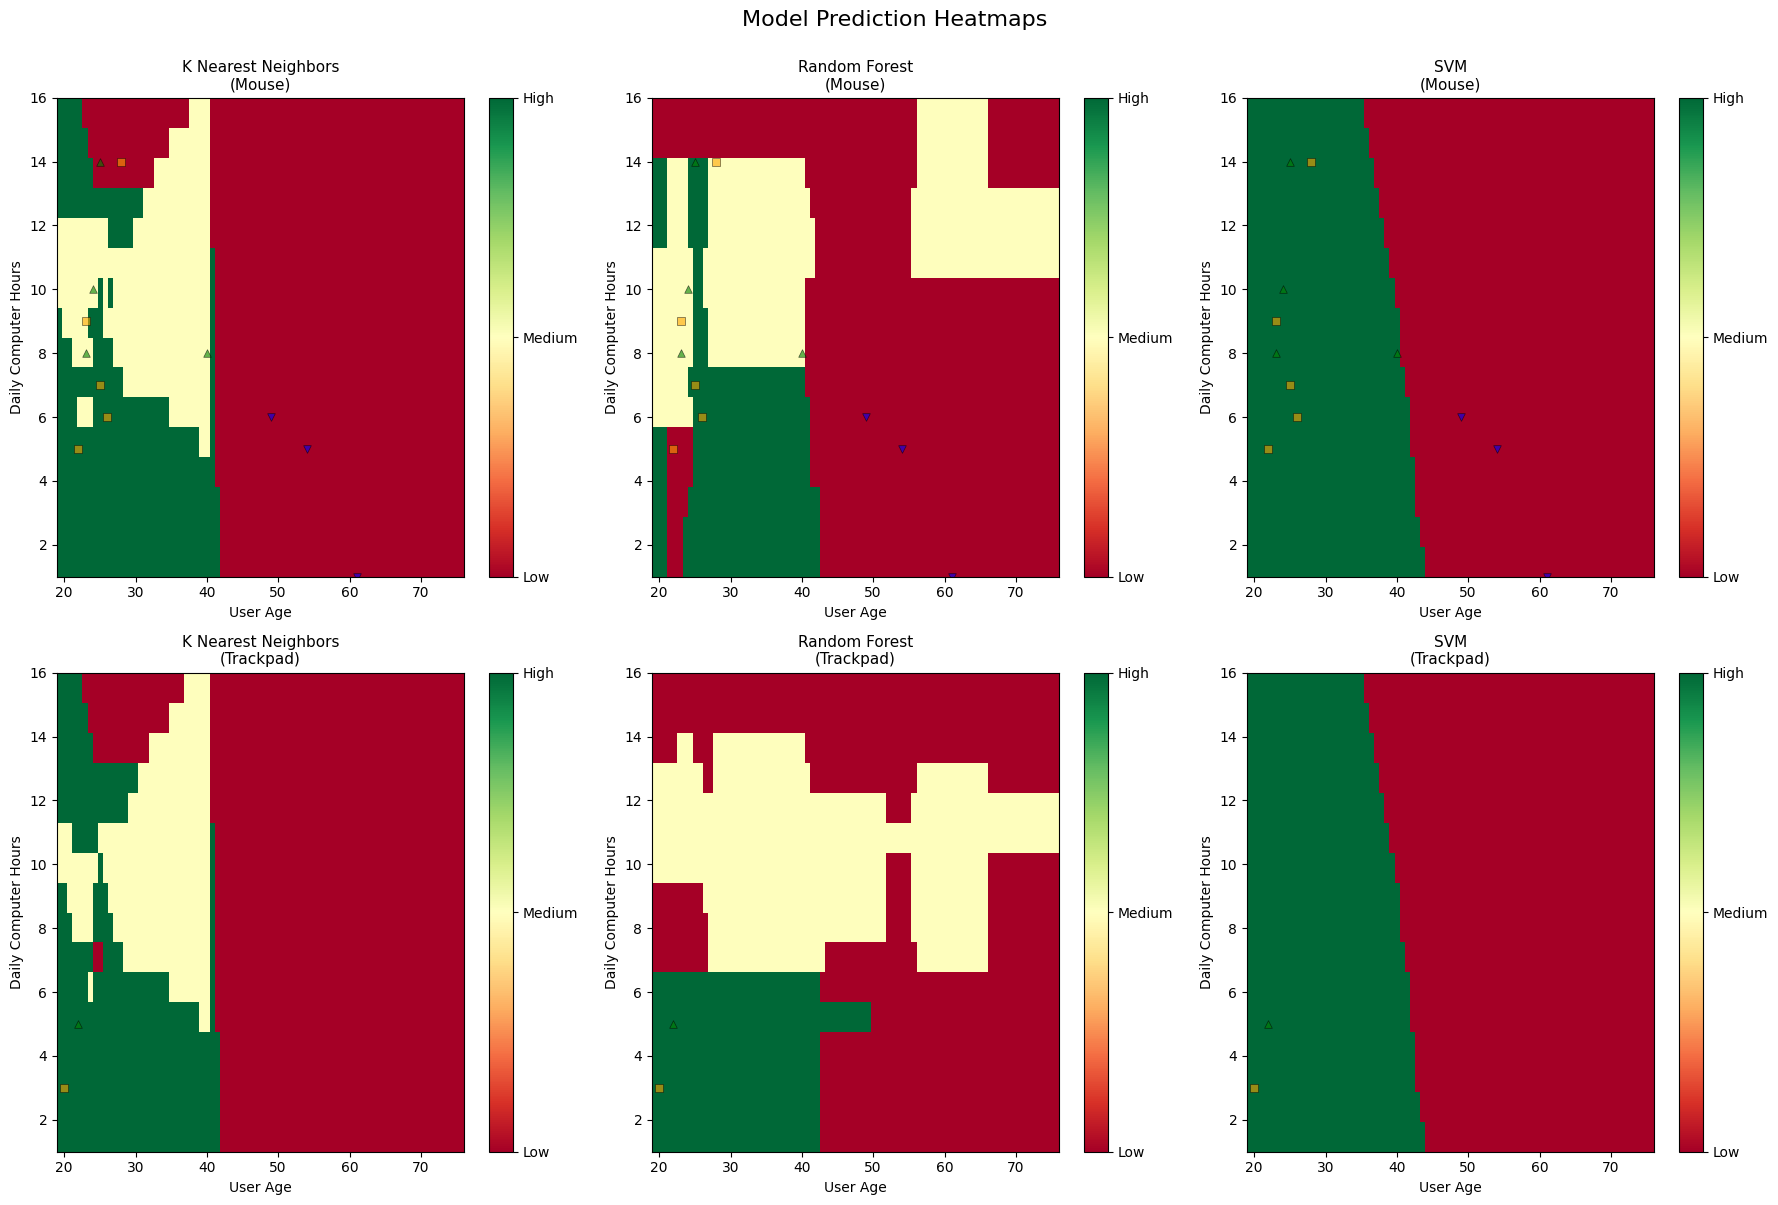

In [1011]:
# Create prediction heatmaps for each model
import matplotlib.pyplot as plt

# Create a grid of values for predictions
age_range = np.linspace(X['user_age'].min(), X['user_age'].max(), 80)
computer_time_range = np.linspace(X['computer_time'].min(), X['computer_time'].max(), 16)

# Create meshgrid for both devices
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Model Prediction Heatmaps', fontsize=16, y=1.00)

devices = [0, 1]  # 0 for one device, 1 for the other
device_names = ['Mouse', 'Trackpad']

for device_idx, (device_val, device_name) in enumerate(zip(devices, device_names)):
    for model_idx, (name, model) in enumerate(models_with_best_params.items()):
        ax = axes[device_idx, model_idx]
        
        # Create a grid of predictions
        predictions = np.zeros((len(computer_time_range), len(age_range)))
        
        for i, comp_time in enumerate(computer_time_range):
            for j, age in enumerate(age_range):
                X_pred = np.array([[age, comp_time, device_val]])
                pred = model.predict(X_pred)[0]
                # Map categories to numbers for visualization
                if pred == 'low':
                    predictions[i, j] = 0
                elif pred == 'medium':
                    predictions[i, j] = 1
                else:  # high
                    predictions[i, j] = 2
        
        # Create heatmap
        im = ax.imshow(predictions, cmap='RdYlGn', aspect='auto', origin='lower',
                      extent=[age_range.min(), age_range.max(), 
                             computer_time_range.min(), computer_time_range.max()])
        
        ax.set_xlabel('User Age', fontsize=10)
        ax.set_ylabel('Daily Computer Hours', fontsize=10)
        ax.set_title(f'{name}\n({device_name})', fontsize=11)
        
        # Add colorbar
        cbar = plt.colorbar(im, ax=ax, ticks=[0, 1, 2])
        cbar.set_ticklabels(['Low', 'Medium', 'High'])
        
        # Scatter actual data points on top
        device_mask = X_test['device_encoded'] == device_val
        X_test_device = X_test[device_mask]
        y_test_device = y_test[device_mask]
        
        for category, marker, color in [('low', 'v', 'blue'), 
                                        ('medium', 's', 'orange'), 
                                        ('high', '^', 'green')]:
            mask = y_test_device == category
            if mask.sum() > 0:
                ax.scatter(X_test_device[mask]['user_age'], 
                          X_test_device[mask]['computer_time'],
                          c=color, marker=marker, s=30, 
                          edgecolors='black', linewidth=0.5,
                          alpha=0.6, label=f'Actual {category}')

plt.tight_layout()
plt.show()